In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from numpy.random import normal
import time

#### Solución Analítica.

##### Definición: (Solución Fundamental) 
La función
    $$\Phi(x,t) = \frac{1}{(4\pi t)^{n/2}} \exp \left(\frac{-|x|^2}{4t}\right) $$ se denomina la solución fundamental de la ecuación de calor.

##### Teorema [Evans]: (Representación de soluciones)
Si $g \in C(\mathbb{R}^n) \cap L^\infty (\mathbb{R}^n)$, entonces 
    $$u(x,t) = (g*\Phi(\cdot, t))(x), \, \forall x \in \mathbb{R}^n, t > 0$$
    es tal que $u$ resuelve el problema de valor inicial:
    $$ \begin{cases}
            u_t - \Delta u = 0 & \mathbb{R}^n \times (0,\infty) \\
            u(x,0) = g(x)      & \forall x \in \mathbb{R}^n \\
            \end{cases} $$

In [2]:
def Bt(N, T, K,ty=False):
    step = T/K
    t = list(map(lambda r: r*step,range(0, K+1)))
    B = np.zeros((N, K+1))
    normals = normal(size=(N, K+1))
    for i in range(1, K+1):
        B[:, i] = B[:, i-1] + np.sqrt(step) * normals[:, i]
    if ty:
        return B
    return B[:,-1]

def heat1d(f,x,Bt):
    return np.mean(f(Bt+x))

def heat2d(f,x,y,Bt1,Bt2):
    ef=[]
    for i in range(len(Bt1)):
        ef.append(f(Bt1[i]+x,Bt2[i]+y)) 
    return np.mean(ef)

def ftheat1d(f,X,t,N,h):
    K=np.int32(np.ceil(t/h))
    B=Bt(N,t,K)
    ftx=np.zeros(len(X))
    hx=0
    for x in X:
        ftx[hx]=heat1d(f,x,B)
        hx+=1
    return ftx

def ftheat2d(f,X,Y,t,N,h):
    K=np.int32(np.ceil(t/h))
    B1=Bt(N,t,K)
    B2=Bt(N,t,K)
    ftx=np.zeros([len(X),len(Y)])
    hx=0
    hy=0
    for x in X:
        for y in Y:
            ftx[hx][hy]=heat2d(f,x,y,B1,B2)
            hy+=1
        hy=0
        hx+=1
    return ftx
        
def gaussiana1d(x):
    return np.exp(-x**2)

def gaussiana2d(x,y):
    return np.exp(-x**2-y**2)

def wave(x,y):
    return np.sin(x)*np.sin(y)*np.exp(-x**2-y**2)

#### Simulación del problema en R.


<IPython.core.display.Javascript object>


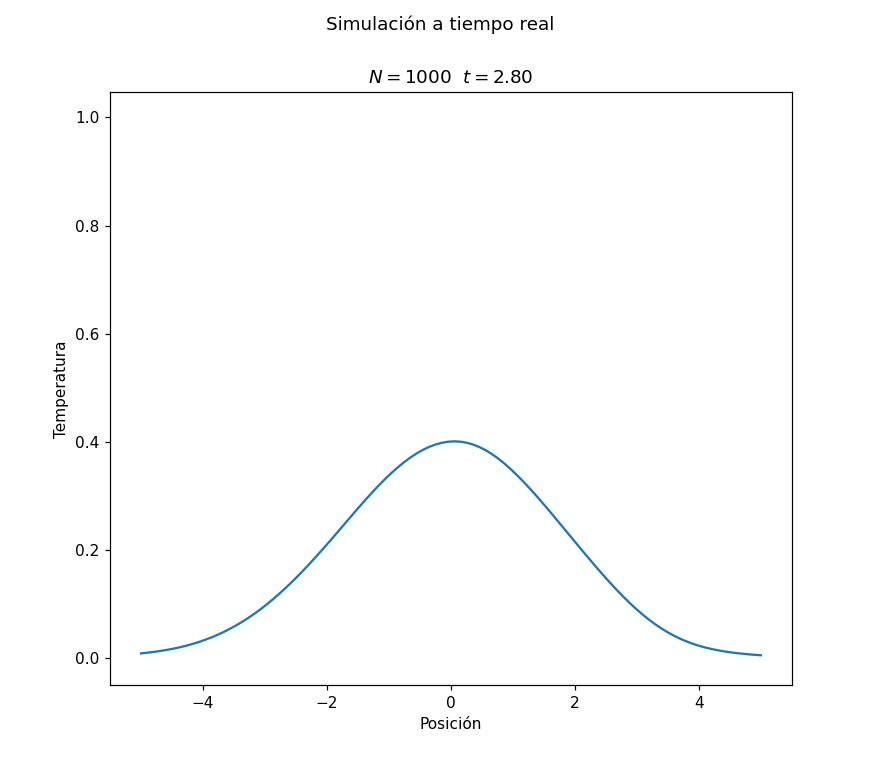

In [16]:
# creating initial data values
# of x and y
%matplotlib notebook
N=1000
h=0.01
dt=0.1
t=0.001
x = np.linspace(-5, 5, 100)
ground_state = ftheat1d(gaussiana1d,x,t,N,h)
# to run GUI event loop
plt.ion()
 
# here we are creating sub plots

plt.ion()
#Simulacion en tiempo real
def simulate(*args):
    global ground_state
    global t
    ground_state = ftheat1d(gaussiana1d,x,t,N,h)
    t+=dt

simulate()

fig, ax = plt.subplots(figsize=(8, 7))
line1, = ax.plot(x, ground_state)
#plt.rcParams['figure.dpi'] = 300
#im = plt.imshow(ground_state, animated = True,cmap='Greys')
#im.title('W')

def update_fig(*args):
    global ground_state
    simulate(ground_state, 1000, 2.1)
    # updating data values
    line1.set_xdata(x)
    line1.set_ydata(ground_state)
    plt.suptitle('Simulación a tiempo real')
    plt.xlabel("Posición")
    plt.ylabel("Temperatura")
    plt.title(r'$N=$'+str(N)+r'  $t =$'+str("{:.2f}".format(t)))
    return line1

ani = animation.FuncAnimation(fig, update_fig, interval = 0.01,save_count=100)
plt.show();
#ani.save("heat1d.mp4",fps=10)

<IPython.core.display.Javascript object>


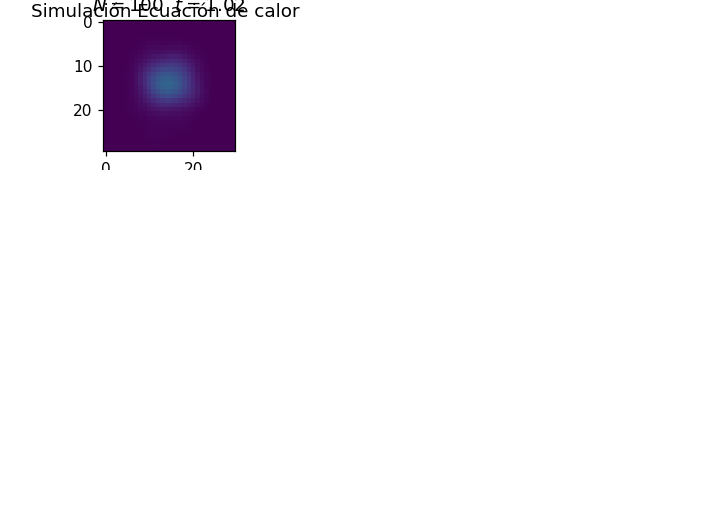

MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

In [17]:
# creating initial data values
# of x and y
%matplotlib notebook
N=100
h=0.1
dt=0.01
t=0.001
x = np.linspace(-5, 5, 30)
y = np.linspace(-5, 5, 30)
ground_state = ftheat2d(gaussiana2d,x,y,t,N,h)
#simulacion en timepo real
def simulate(*args):
    global ground_state
    global t
    ground_state = ftheat2d(gaussiana2d,x,y,t,N,h)
    t+=dt

simulate()

fig = plt.figure()
#plt.rcParams['figure.dpi'] = 300
im = plt.imshow(ground_state, animated = True)
#im.title('W')

def update_fig(*args):
    global ground_state
    simulate(ground_state, 1000, 2.1)
    im.set_data(ground_state)
    plt.suptitle('Simulación Ecuación de calor')
    plt.title(r'$N=$'+str(N)+r'  $t =$'+str("{:.2f}".format(t)))
    return im

ani = animation.FuncAnimation(fig, update_fig, interval = 0.01,save_count=100)
plt.show();
ani.save("Bisisng75001.mp4",fps=60)